# Ques no: 1

In [212]:
import pandas as pd
import numpy as np
import scipy as stats

df1 = pd.read_csv(".\downloads\insurance.csv")

df1.head()#To see basic structure of data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [213]:
df1.info() #To check data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [214]:
df1.describe() #To see summary of basic statistics for numerical data.

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [215]:
if "expenses" in df1.columns:
    print("Its is supervised data, because it has target column `Expenses` in the given dataset")
else:
    print("Its not supervised data. it does have target column in the dataset")
    

Its is supervised data, because it has target column `Expenses` in the given dataset


# Ques no: 2

In [216]:
from scipy.stats import norm
import numpy as np
import pandas as pd

df2 = pd.read_csv(".\downloads\insurance.csv")

#parameters
confidence_level = 0.99
se = 0.02
p = 0.5 #estimated proportion
q = 1-p

z_score = norm.ppf((1+confidence_level)/2)

n = (z_score**2 / se**2) * p * q 
n = np.ceil(n)

print(f"The estimated minimum sample size required for 99% accuracy is: {int(n)}")

The estimated minimum sample size required for 99% accuracy is: 4147


# ques no: 3

In [217]:
import pandas as pd

df3 = pd.read_csv(".\downloads\insurance.csv")

#To check null values
df3.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [218]:
# to check duplicated data in data set
duplicate_rows = df3[df3.duplicated()]
duplicate_rows

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [219]:
dup_mask = df3.duplicated(keep = False)
df3[dup_mask]

,age,sex,bmi,children,smoker,region,expenses
195,19,male,30.6,0,no,northwest,1639.56
581,19,male,30.6,0,no,northwest,1639.56


In [220]:
# To Drop all duplicates
cleaned_df3 = df3.drop_duplicates()
cleaned_df3

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [221]:
# To change String to numerical data

df_str_to_nums = pd.get_dummies(cleaned_df3, drop_first = True)
df_str_to_nums

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,False,True,False,False,True
1,18,33.8,1,1725.55,True,False,False,True,False
2,28,33.0,3,4449.46,True,False,False,True,False
3,33,22.7,0,21984.47,True,False,True,False,False
4,32,28.9,0,3866.86,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,True,False,True,False,False
1334,18,31.9,0,2205.98,False,False,False,False,False
1335,18,36.9,0,1629.83,False,False,False,True,False
1336,21,25.8,0,2007.95,False,False,False,False,True


In [222]:
from scipy import stats
import numpy as np

# To Select only numeric columns
numeric_cols = cleaned_df3.select_dtypes(include=[np.number])

# Calculate Z-scores
z_crit = np.abs(stats.zscore(numeric_cols))

# Set a threshold for outliers (typically 3)
threshold = 3
outliers = np.where(z_crit > threshold)

# Identify number of outliers
num_outliers = len(outliers[0])

num_outliers

29

In [223]:
duplicate_mask = cleaned_df3.duplicated(keep =False)  # keep=False -- marks all duplicates as True
cleaned_df3[duplicate_mask]

,age,sex,bmi,children,smoker,region,expenses


# Ques 4

In [224]:
import pandas as pd
from scipy.stats import chi2_contingency



contingency_table = pd.crosstab(cleaned_df3['sex'],cleaned_df3['smoker'])

print(contingency_table)

chi2_stat, p_value, dof, expected= chi2_contingency(contingency_table)

#display results
print(f'chi-square statistic: {chi2_stat}')
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("***************************")
print("Expected Frequencies Table:")
print(expected)

# Interpretation of the p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Fail to reject the null hypothesis: Sex and smoking are independent.")
else:
    print("Reject the null hypothesis: Sex and smoking are not independent.")



smoker   no  yes
sex             
female  547  115
male    516  159
chi-square statistic: 7.469139330086637
P-value: 0.0062765550120107375
Degrees of Freedom: 1
***************************
Expected Frequencies Table:
[[526.33208676 135.66791324]
 [536.66791324 138.33208676]]
Fail to reject the null hypothesis: Sex and smoking are independent.


# ques 5

In [225]:
import pandas as pd

#columns_of_interest = ['age', 'sex', 'bmi', 'children', 'smoker', 'expenses']


df5 = pd.read_csv(".\downloads\insurance.csv")

cleaned_df5 = pd.get_dummies(df5)


#calculate the correlation matrix
correlation_matrix = cleaned_df5.corr()
print(correlation_matrix['expenses']) #inspect correlation of expenses with other variable.


# df5['sex'] = df5['sex'].map({'male':0 , 'female': 1})
# df5['smoker'] = df5['smoker'].map({'yes': 1, 'no': 0})

# # Calculate the correlation matrix
# correlation_matrix = df5[columns_of_interest].corr()

# # Display correlation of 'expenses' with other variables
# print("Correlation of expenses with other variables:")
# print(correlation_matrix['expenses'])


age                 0.299008
bmi                 0.198576
children            0.067998
expenses            1.000000
sex_female         -0.057292
sex_male            0.057292
smoker_no          -0.787251
smoker_yes          0.787251
region_northeast    0.006349
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
Name: expenses, dtype: float64


# Ques 6


In [226]:
df1['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [234]:
import pandas as pd
import statsmodels.api as sm

df6 = pd.read_csv(".\downloads\insurance.csv")

df6 = df6.drop_duplicates() # removed duplicate rows

df6['sex'] = df6['sex'].map({'male': 0, 'female': 1})
df6['smoker'] = df6['smoker'].map({'yes': 1, 'no': 0})
df6['region'] = df6['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

# the regressor variables
x = df6.drop(columns = "expenses")

#response variables
y = df6['expenses']

x_const = sm.add_constant(x)

model = sm.OLS(y, x_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     667.1
Date:                Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:50:20   Log-Likelihood:                -13539.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1330   BIC:                         2.713e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.301e+04   1026.309    -12.672      0.0

# ques 7

      age  sex   bmi  children  smoker  region  expenses  predicted_expenses
0      19    1  27.9         0       1       0  16884.92        25110.518427
1      18    0  33.8         1       0       1   1725.55         3701.443130
2      28    0  33.0         3       0       1   4449.46         6965.110966
3      33    0  22.7         0       0       2  21984.47         3741.500253
4      32    0  28.9         0       0       2   3866.86         5546.870981
...   ...  ...   ...       ...     ...     ...       ...                 ...
1333   50    0  31.0         3       0       2  10600.55        12311.748050
1334   18    1  31.9         0       0       3   2205.98         3427.547598
1335   18    1  36.9         0       0       1   1629.83         4383.188661
1336   21    1  25.8         0       0       0   2007.95         1108.250318
1337   61    1  29.1         0       1       2  29141.36        37019.305285

[1337 rows x 8 columns]


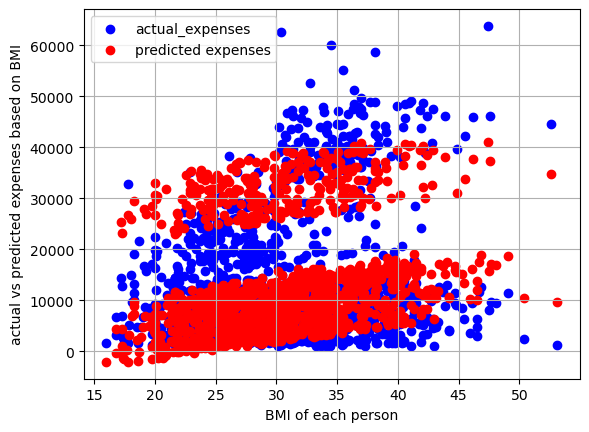

In [228]:
import matplotlib.pyplot as plt

predicted_expenses = model.predict(x_const)
df6['predicted_expenses'] = predicted_expenses
print(df6)

#plot actual expenses
plt.scatter(df6['bmi'], df6['expenses'], color = 'blue', label = 'actual_expenses')

#plot predicted expenses based on BMI 
plt.scatter(df6['bmi'], df6['predicted_expenses'], color = "red", label = 'predicted expenses')

plt.xlabel("BMI of each person")
plt.ylabel("actual vs predicted expenses based on BMI")
plt.grid()
plt.legend()

# to show the plot
plt.show()

# ques 8

In [229]:
actual_expenses = df6['expenses'].values
predicted_expenses = df6['predicted_expenses'].values

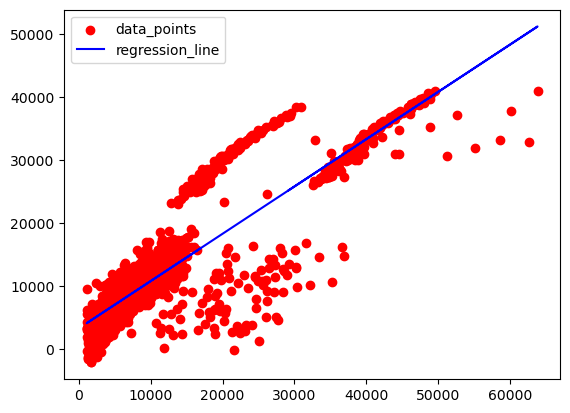

R-Square: 0.750585963565398
mean absolute error: 4174.845045248494
mean squared error: 36551905.65305461
root mean squared error: 64.61304082960726


In [230]:
from scipy.stats import linregress
import numpy as np

slope, intercept, r_value, p_value, SE = linregress(actual_expenses, predicted_expenses)

plt.scatter(actual_expenses, predicted_expenses, color = "red", label = "data_points")
plt.plot(actual_expenses, slope*actual_expenses + intercept, color = "blue", label = "regression_line" )
plt.legend()
plt.show()


#calculate R-squared
r_squared = r_value**2

# calculate Mean Absolute Error(mae)
mae = np.mean(np.abs(actual_expenses - predicted_expenses))


# calculate mean squared error
mse = np.mean((actual_expenses - predicted_expenses) **2)

#calculate Root mean squared error (RMSE)
rmse = np.sqrt(mae)

print(f'R-Square: {r_squared}')
print(f'mean absolute error: {mae}')
print(f'mean squared error: {mse}')
print(f'root mean squared error: {rmse}')




# ques 9 

In [263]:
import pandas as pd
import statsmodels.api as sm

df9 = pd.read_csv(".\downloads\insurance.csv")
df9 = df9.drop_duplicates()

df9['sex'] = df9['sex'].map({'male': 0, 'female': 1})
df9['smoker'] = df9['smoker'].map({'yes': 1, 'no': 0})
df9['region'] = df9['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

x = df9[["age","sex","bmi","children","smoker", "region"]]
y = df9["expenses"]


# Drop rows with missing or infinite values
#df9 = df9.dropna()
#df9 = df9.replace([np.inf, -np.inf], np.nan).dropna()

#adds constant column which helps to make prediction
X_const = sm.add_constant(x)

# creating model and fit
model = sm.OLS(y, X_const).fit()




# Predict insurance charges for Age = 29, Sex = Female, BMI = 28, Children = 1, Smoker = Yes
custom_data = pd.DataFrame({'const': [1],
                           'age': [29],
                           'sex': [1],
                           'bmi': [28],
                           'children': [1],
                           'smoker': [1],
                           'region': [1]})

predicted_expense = model.predict(custom_data)

print(f'predicted insurance expense for that custom data is: {predicted_expense.values[0]}')

predicted insurance expense for that custom data is: 28548.480682788213


In [264]:
X_const

,const,age,sex,bmi,children,smoker,region
0,1.0,19,1,27.9,0,1,0
1,1.0,18,0,33.8,1,0,1
2,1.0,28,0,33.0,3,0,1
3,1.0,33,0,22.7,0,0,2
4,1.0,32,0,28.9,0,0,2
...,...,...,...,...,...,...,...
1333,1.0,50,0,31.0,3,0,2
1334,1.0,18,1,31.9,0,0,3
1335,1.0,18,1,36.9,0,0,1
1336,1.0,21,1,25.8,0,0,0


# ques 10

In [267]:
import numpy as np

x = df9[["age","sex","bmi","children","smoker", "region"]]
y = df9["expenses"]


prediction = model.predict(X_const) 

# To calculate mean absolute percentage error

mape = np.mean(np.abs((y - prediction)/ y)) *100

print(f'mean absolute percentage error: {mape:.2f}')

mean absolute percentage error: 42.24


# ques 11

In [279]:
from scipy import stats
import pandas as pd
import numpy as np

#To calculate average expense value of expenses
mean = df9['expenses'].mean()

#To calculate standard deviation(sigma) of expenses
sigma = df9['expenses'].std()

n =len(df9)
sem = sigma/np.sqrt(n)

# To calculate 95% confidence level
z_stat = stats.norm.ppf((1+confidence_level)/ 2)
margin_of_error = z_stat * sem

#calculate the lower and upper bound of confidence interval
confidence_interval_lower = mean - margin_of_error
confi_interval_upper = mean + margin_of_error

print(f'95% confidence interval for average expense insurance lower and upper bound: {confidence_interval_lower:.2f} , {confi_interval_upper:.2f}')

95% confidence interval for average expense insurance lower and upper bound: 12629.98 , 13928.26
